## Importing the Dependencies

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib

### Data Collection and Processing

In [36]:
car_data=pd.read_csv("car data.csv")

In [37]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [38]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [40]:
car_data.shape

(301, 9)

In [41]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [42]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [44]:
print(car_data.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [45]:
print(car_data.Selling_type.value_counts())

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [46]:
print(car_data.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [47]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

## Analysis using Linear Regression

In [48]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
model=LinearRegression()

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
pred=model.predict(X_test)

In [54]:
print("MAE:",(mean_absolute_error(pred,y_test)))
print("MSE:",(mean_squared_error(pred,y_test)))
print("R2 score:",(r2_score(pred,y_test)))

MAE: 1.2581987927237939
MSE: 3.4953688860122467
R2 score: 0.8293505189463009


In [55]:
df_5=car_data.head(5)
df_5

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Visualization using Bar Plot

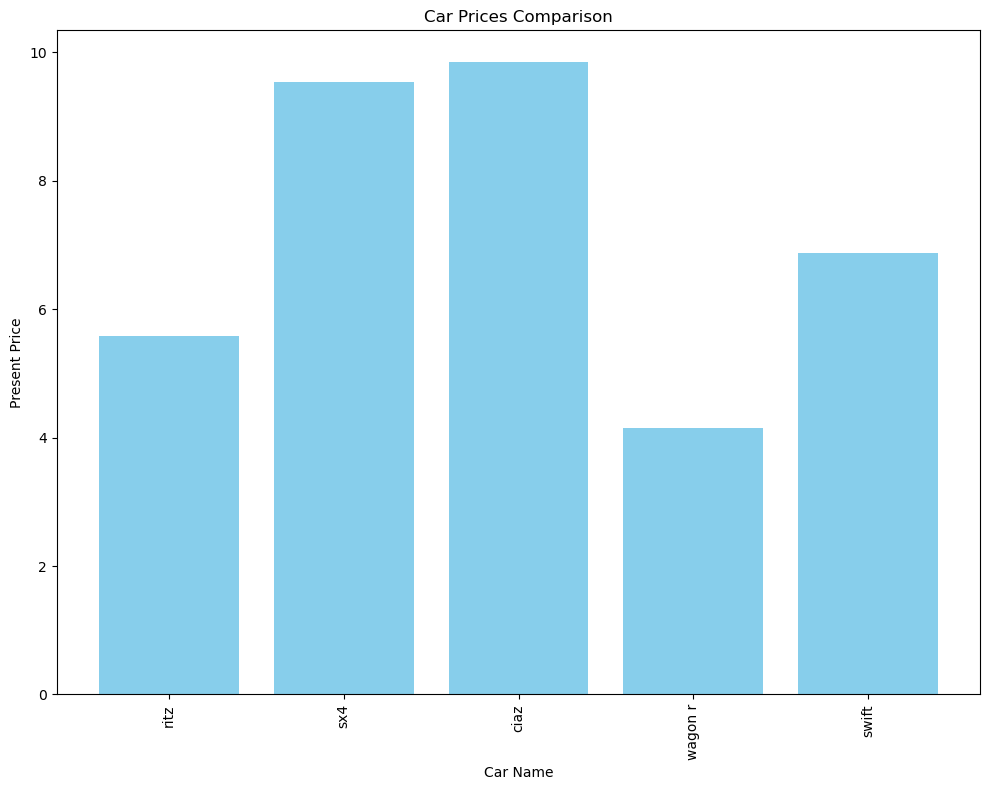

In [56]:
car_names=df_5['Car_Name']
present_prices=df_5['Present_Price']
plt.figure(figsize=(10,8))
plt.bar(car_names,present_prices,color='skyblue')
plt.xlabel('Car Name')
plt.ylabel('Present Price')
plt.title('Car Prices Comparison')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualization Using Pie plot

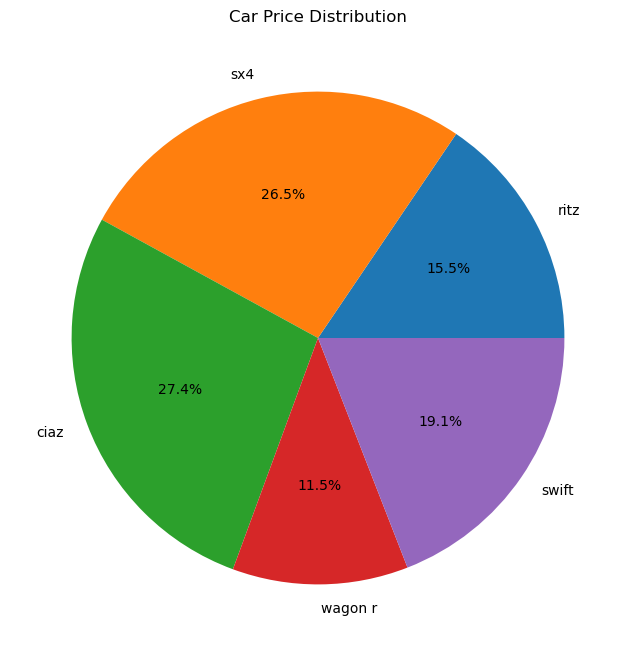

In [57]:
plt.figure(figsize=(8,8))
plt.pie(present_prices,labels=car_names,autopct='%1.1f%%',colors=plt.get_cmap('tab10').colors)
plt.title('Car Price Distribution')
plt.show()

## Analysis Using Lasso Regression

In [58]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [60]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [61]:
lasso=Lasso(alpha=1.0)
lasso.fit(X_train_scaled,y_train)

Lasso()

In [62]:
y_pred=lasso.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse}")
print(f"R-squared:{r2}")

Mean Squared Error:7.206163783089437
R-squared:0.7469230518716634


## Linear Regression Model

In [63]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred=linear_model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Linear Regression Model - MSE: {mse}, R-squared:{r2}')
joblib.dump(linear_model,'car_price_linear_model.pkl')

Linear Regression Model - MSE: 3.4953688860122467, R-squared:0.8772443540166837


['car_price_linear_model.pkl']

In [64]:
model=joblib.load('car_price_linear_model.pkl')

In [73]:
new_car_data=pd.DataFrame({'Year':[2017],'Present_Price':[5.5],'Driven_kms':[40000],'Fuel_Type':[1],'Selling_type':[0],'Transmission':[1],'Owner':[1]})


In [75]:
predicted_price=model.predict(new_car_data)[0]
print(f'Predicted Selling Price: ₹{predicted_price:.2f} lakhs')

Predicted Selling Price: ₹6.80 lakhs
